In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
from matplotlib import colors as mcolors
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
values=pd.DataFrame()

In [3]:
values['bitrate']=[18.4,14.6,10.7,9.7,8.7,7.8,6.7,5.6,4.5,3.7,2.9,2,1.7,1.4]

In [4]:
values['dmos_clean']=[4.77083,4.70833,4.6875,4.89583,4.83333,4.89583,4.625,4.77083,4.3125,4.16667,4,3.54167,3.39583,3.27083]

In [5]:
values['dmos_noise']=[4.97059,4.78571,5.01515,5.09259,4.86111,5.11111,4.97222,4.84722,4.65278,4.51429,4.22222,4.02778,3.61429,3.30556]

In [6]:
clean_values = pd.read_csv('~/Desktop/clean_values.csv', header=0) #balloon, bugs, model, nature
noise_values = pd.read_csv('~/Desktop/noise_values.csv', header=0)

In [7]:
clean_values = clean_values.transform(lambda x: x[::-1]).reset_index(drop=True)
noise_values = noise_values.transform(lambda x: x[::-1]).reset_index(drop=True)

In [8]:
import scipy.optimize

def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def inv_sigmoid(p,y):
    x0,y0,c,k=p
    x = x0 + (1/k)*np.log((y-y0)/(-y+c+y0))
    return x

def residuals(p,x,y):
    return y - sigmoid(p,x)

def resize(arr,lower=0.0,upper=1.0):
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr *= (upper-lower)/arr.max()
    arr += lower
    return arr

In [9]:
def fitting_poly(indice, datos_clean, datos_noise, rango=3):
    indice = np.flip(indice)
    datos_clean = np.flip(datos_clean)
    datos_noise = np.flip(datos_noise)
    z_clean = np.polyfit(indice,datos_clean,rango)
    #print(z_clean)
    f_clean = np.poly1d(z_clean)
    #print(f_clean)
    z_noise = np.polyfit(indice,datos_noise,rango)
    f_noise = np.poly1d(z_noise)
    
    x_new = np.linspace(min(indice), max(indice), 1000)
    
    plt.rcParams.update({'font.size': 12})
    plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    plt.xlabel('Bitrate')
    plt.ylabel('DMOS')
    plt.title(content)
    plt.grid(True)    
    plt.plot(indice, datos_clean, '.', x_new, f_clean(x_new), '-')
    plt.plot(indice, datos_noise, '.', x_new, f_noise(x_new), '-')
    plt.show()

In [10]:
def fitting_sigmoid(indice, datos_clean, datos_noise):
    p_guess_clean=(np.median(indice),np.median(datos_clean),1.0,1.0)
    p_clean, cov_clean, infodict_clean, mesg_clean, ier_clean = scipy.optimize.leastsq(
        residuals,p_guess_clean,args=(indice,datos_clean),full_output=1)
    p_guess_noise=(np.median(indice),np.median(datos_noise),1.0,1.0)
    p_noise, cov_noise, infodict_noise, mesg_noise, ier_noise = scipy.optimize.leastsq(
        residuals,p_guess_clean,args=(indice,datos_noise),full_output=1)
    
    x0,y0,c,k=p_clean
    print('''\
    x0_clean = {x0}
    y0_clean = {y0}
    c_clean = {c}
    k_clean = {k}
    '''.format(x0=x0,y0=y0,c=c,k=k))
    x0,y0,c,k=p_noise
    print('''\
    x0_noise = {x0}
    y0_noise = {y0}
    c_noise = {c}
    k_noise = {k}
    '''.format(x0=x0,y0=y0,c=c,k=k))
    
    xp = np.linspace(min(indice), max(indice), 100) #-0.16
    pxp_clean=sigmoid(p_clean,xp)
    pxp_noise=sigmoid(p_noise,xp)
    
    return [xp, pxp_clean, pxp_noise,p_clean,p_noise]

In [11]:
content='global'

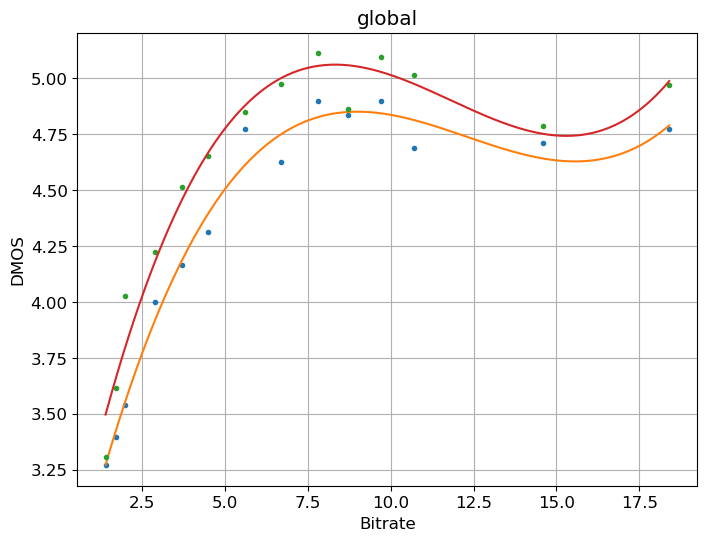

TypeError: cannot unpack non-iterable NoneType object

In [12]:
x_new, y_new_or_clean, y_new_or_noise = fitting_poly(values['bitrate'].values, 
                                           values['dmos_clean'], 
                                           values['dmos_noise'],
                                           rango=3)

In [13]:
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(x_new, y_new_or_clean, linewidth=2, color='orange')
plt.plot(x_new, y_new_or_noise, linewidth=2, color='red')
plt.scatter(values['bitrate'].values, clean_values[content].values,   color='blue', marker='x')
plt.scatter(values['bitrate'].values, noise_values[content].values,   color='green', marker='x')
#plt.tick_params(labelsize=12)
plt.grid(True)
#plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel("Bitrate")
plt.ylabel("DMOS")

NameError: name 'x_new' is not defined

<Figure size 800x600 with 0 Axes>

In [14]:
xp, pxp_clean, pxp_noise, p_clean, p_noise = fitting_sigmoid(values['bitrate'].values, 
                                   values['dmos_clean'], 
                                   values['dmos_noise'])

    x0_clean = 2.2343885630950275
    y0_clean = 2.4691322867823904
    c_clean = 2.3315091643758947
    k_clean = 0.7459334175886999
    
    x0_noise = -10.470114870061998
    y0_noise = -1621.7402456705804
    c_noise = 1626.7224623369575
    k_noise = 0.5826350385590449
    


In [15]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [16]:
max_value = pxp_clean[xp==find_nearest(xp, 10)][0]
min_value_clean = pxp_clean[pxp_noise==find_nearest(pxp_noise, 3.4)]
min_value_noise = pxp_noise[pxp_noise==find_nearest(pxp_noise, 3.4)]
i_clean = inv_sigmoid(p_clean, np.linspace(pxp_clean[np.logical_and(pxp_clean <= max_value, pxp_clean >= min_value_clean)][0],pxp_clean[np.logical_and(pxp_clean <= max_value, pxp_clean >= min_value_clean)][-1], 50))
i_noise = inv_sigmoid(p_noise, np.linspace(pxp_noise[np.logical_and(pxp_noise <= max_value, pxp_noise >= min_value_noise)][0],pxp_noise[np.logical_and(pxp_noise <= max_value, pxp_noise >= min_value_noise)][-1], 50))

In [17]:
import statistics as s
savings = (i_clean-i_noise)/i_clean*100
s.mean(savings)

23.123505138032414

In [18]:
aaa = np.linspace(pxp_clean[np.logical_and(pxp_clean <= max_value, pxp_clean >= min_value_clean)][0],pxp_clean[np.logical_and(pxp_clean <= max_value, pxp_clean >= min_value_clean)][-1], 50)

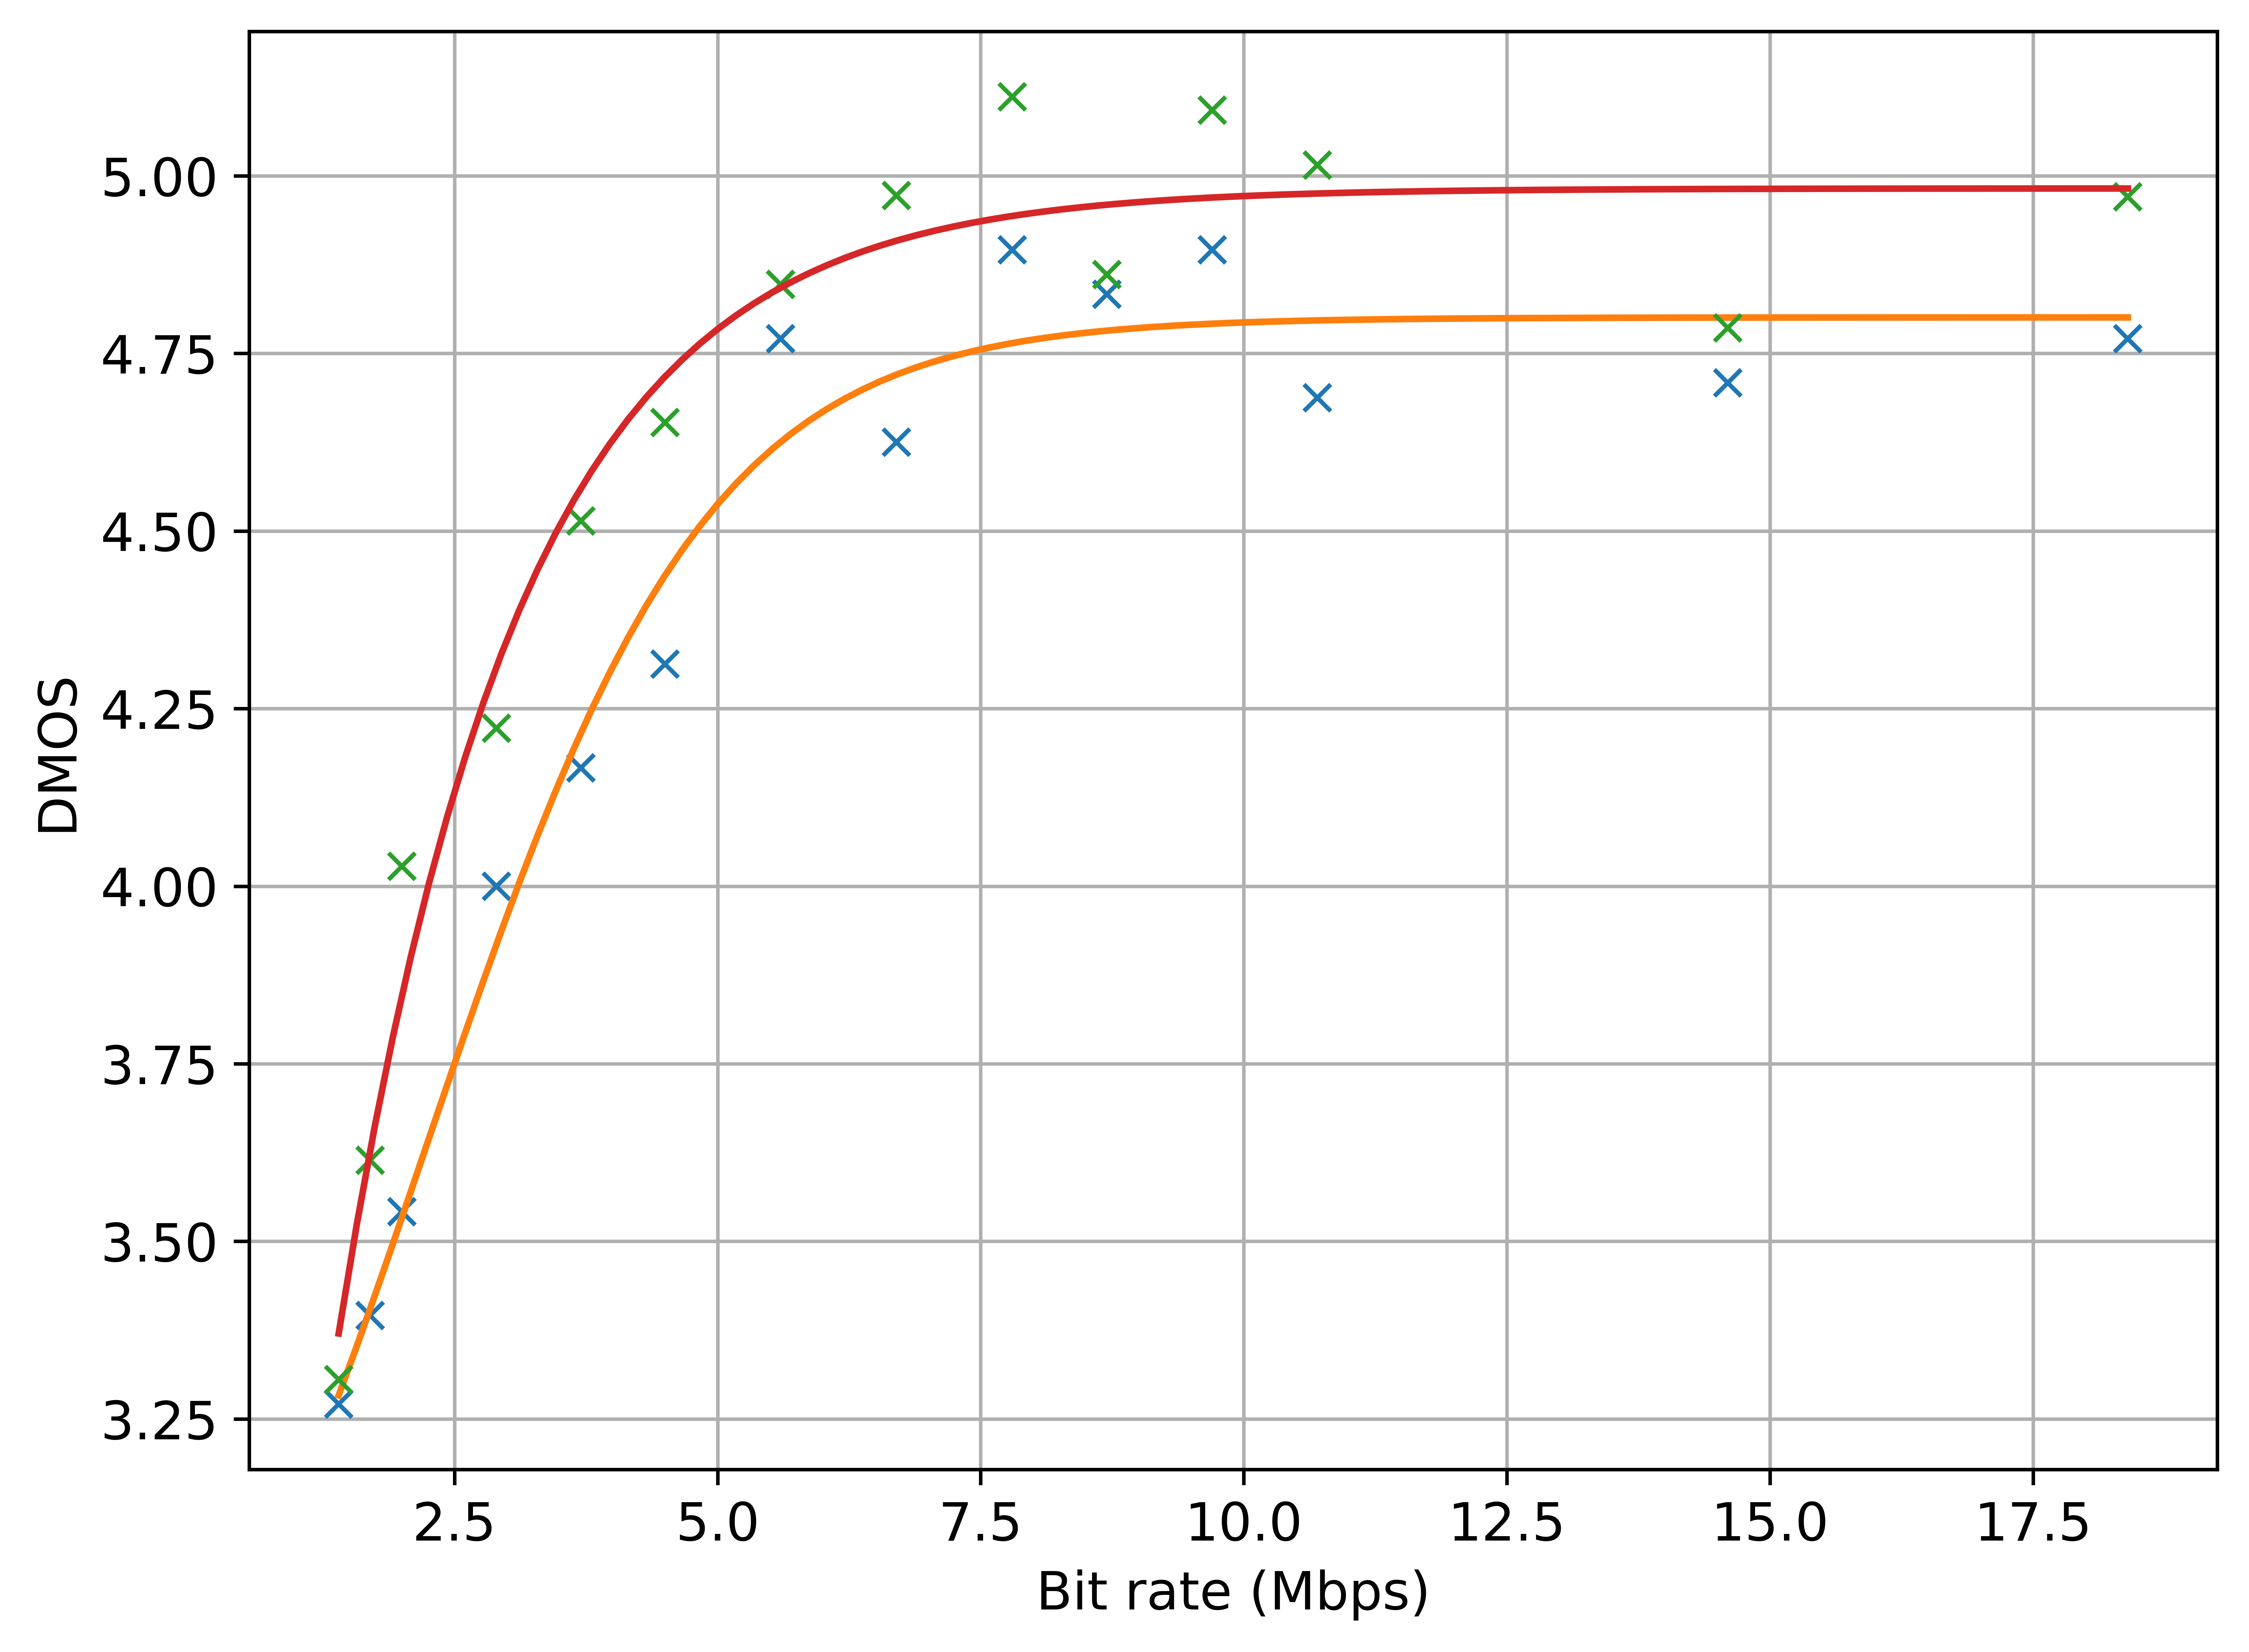

In [19]:
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(8, 6), dpi=1000, facecolor='w', edgecolor='k')
#for i in range(50):
#    plt.hlines(aaa[i], i_noise[i], i_clean[i])
    #plt.hlines(aaa[i], xp[xp<=max(i_noise)][i], i_clean[i])

plt.plot(values['bitrate'].values,values['dmos_clean'], 'x', xp, pxp_clean, '-')
plt.plot(values['bitrate'].values,values['dmos_noise'], 'x', xp, pxp_noise, '-')
#plt.plot(i_clean 'x'
plt.xlabel('Bit rate (Mbps)')
plt.ylabel('DMOS')
plt.grid(True)
plt.show()

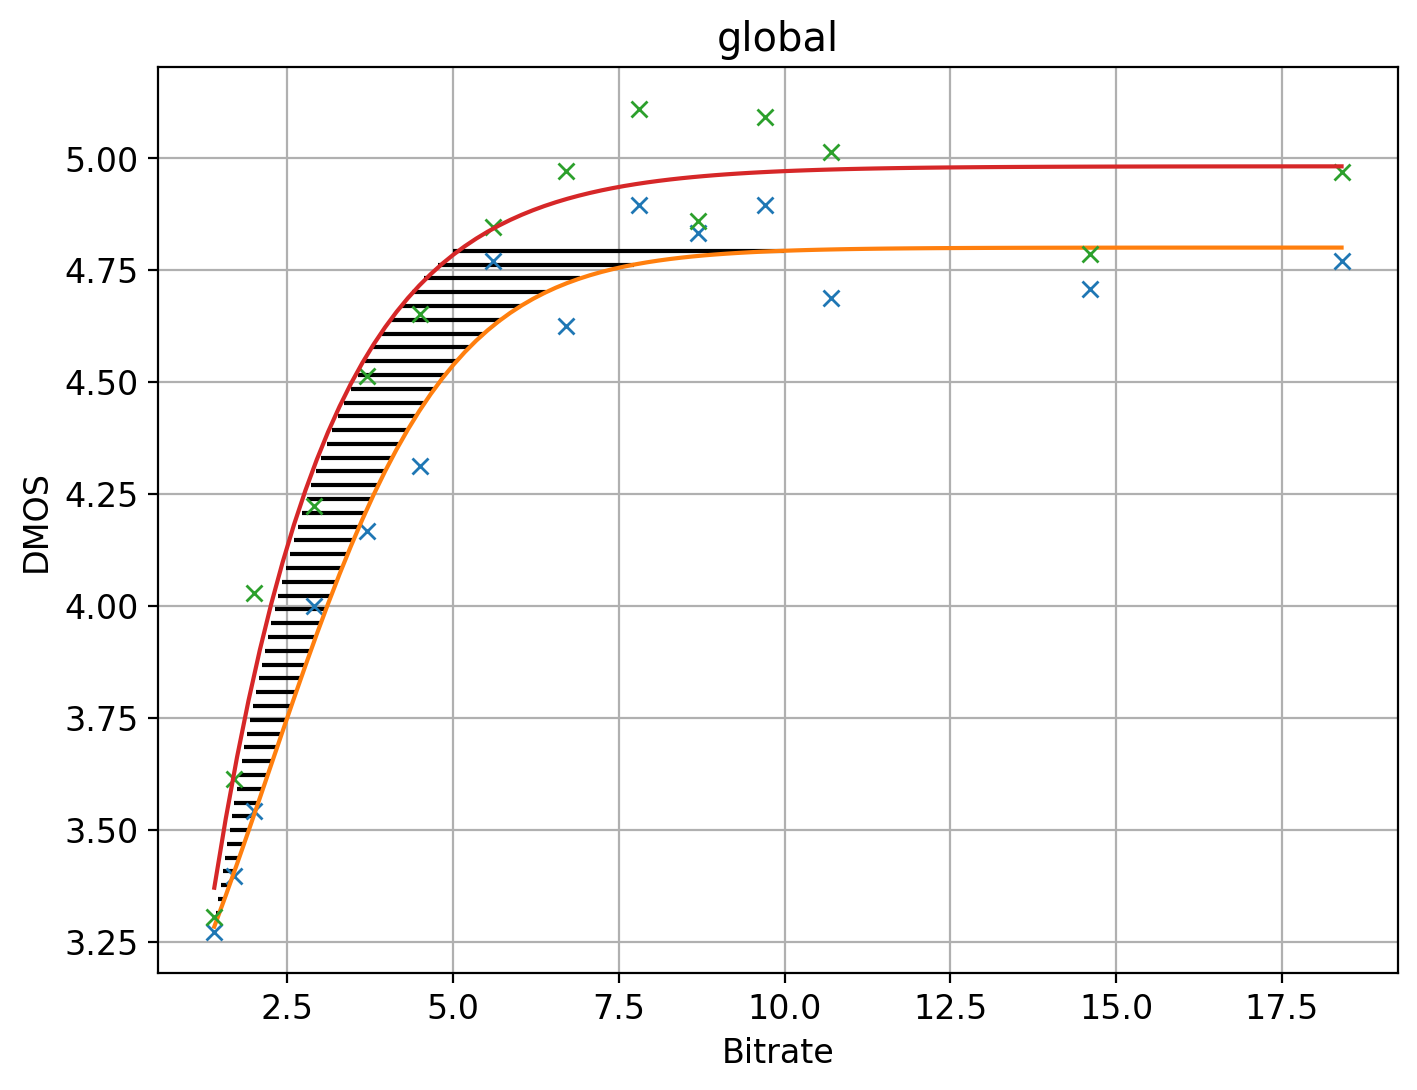

In [20]:
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
for i in range(50):
    plt.hlines(aaa[i], i_noise[i], i_clean[i])
    #plt.hlines(aaa[i], xp[xp<=max(i_noise)][i], i_clean[i])

plt.plot(values['bitrate'].values,values['dmos_clean'], 'x', xp, pxp_clean, '-')
plt.plot(values['bitrate'].values,values['dmos_noise'], 'x', xp, pxp_noise, '-')
#plt.plot(i_clean 'x'
plt.xlabel('Bitrate')
plt.ylabel('DMOS')
plt.title(content)
plt.grid(True)
plt.show()

In [21]:
xp, pxp_clean, pxp_noise, p_clean, p_noise = fitting_sigmoid(values['bitrate'].values, 
                                   values['dmos_clean'], 
                                   values['dmos_noise'])

    x0_clean = 2.2343885630950275
    y0_clean = 2.4691322867823904
    c_clean = 2.3315091643758947
    k_clean = 0.7459334175886999
    
    x0_noise = -10.470114870061998
    y0_noise = -1621.7402456705804
    c_noise = 1626.7224623369575
    k_noise = 0.5826350385590449
    


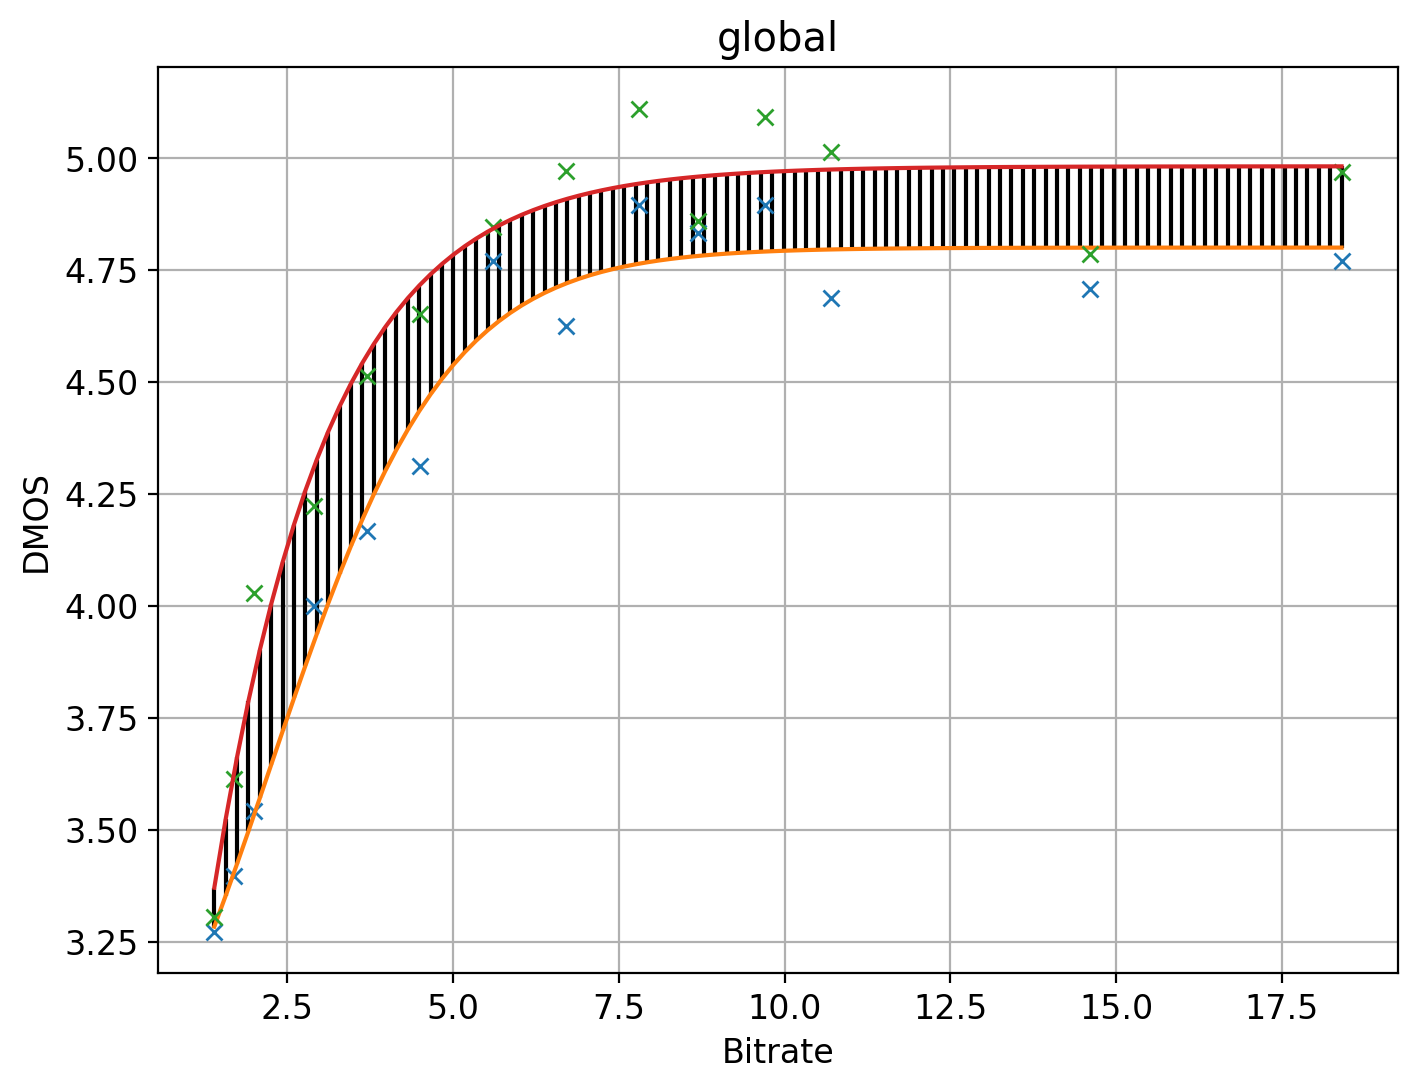

In [22]:
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
for i in range(len(xp)):
    plt.vlines(xp[i], pxp_noise[i], pxp_clean[i])
    #plt.hlines(aaa[i], xp[xp<=max(i_noise)][i], i_clean[i])

plt.plot(values['bitrate'].values,values['dmos_clean'], 'x', xp, pxp_clean, '-')
plt.plot(values['bitrate'].values,values['dmos_noise'], 'x', xp, pxp_noise, '-')
#plt.plot(i_clean 'x'
plt.xlabel('Bitrate')
plt.ylabel('DMOS')
plt.title(content)
plt.grid(True)
plt.show()

In [24]:
import statistics as s
savings = (pxp_noise-pxp_clean)
s.mean(savings)

0.2113319623848532